In [1]:
import tensorflow as tf
import sklearn as sk
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,activation,Dropout,BatchNormalization,Conv2D,MaxPool2D
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#import splitfolders
#input_folder = "D:\ASL classification\data"
#output = "D:\ASL classification\data_split" 
#splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .1, .1))

In [3]:
train_path = "D:/ASL classification/data_split/train"
valid_path = "D:/ASL classification/data_split/val"

In [4]:
train_gen = ImageDataGenerator(rescale=1/255 ,rotation_range=5, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness)
valid_gen = ImageDataGenerator(rescale=1/255 ,rotation_range=5, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness)

train_data = train_gen.flow_from_directory( directory= train_path , target_size=(200,200) , color_mode="rgb" , batch_size=32, class_mode="categorical", shuffle=True, seed=42 )
valid_data = valid_gen.flow_from_directory(directory= valid_path , target_size=(200,200) , color_mode="rgb" , batch_size=32 , class_mode="categorical" , shuffle=True , seed = 42)

Found 69600 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [5]:
  print("TRAIN DATA DETAILS")
  print(train_data.class_indices)
  print(train_data.image_shape)
  print("------------------------")
  print("VALIDATION DATA DETAILS")
  print(valid_data.image_shape)
  print(valid_data.class_indices)
  print("------------------------")

TRAIN DATA DETAILS
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}
(200, 200, 3)
------------------------
VALIDATION DATA DETAILS
(200, 200, 3)
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}
------------------------


In [6]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [7]:
model = Sequential()
model.add(MobileNetV2(include_top = False, weights="imagenet", input_shape=(224, 224, 3)))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(29, activation = 'softmax'))
model.layers[0].trainable = False

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 29)                37149     
                                                                 
Total params: 2,295,133
Trainable params: 37,149
Non-trainable params: 2,257,984
_________________________________________________________________


In [9]:
from keras import optimizers

In [10]:
from keras.callbacks import EarlyStopping

In [11]:
callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [12]:
model.compile(optimizer = optimizers.Adam(lr=0.001), loss = 'categorical_crossentropy', metrics = 'accuracy')

c:\Users\S.Viknesh\miniconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
history = model.fit(train_data,
epochs= 10,
verbose=1,
batch_size = 6 ,
validation_data = valid_data, callbacks=[callback]
)

Epoch 1/10
2175/2175 [==============================] - 672s 307ms/step - loss: 0.6937 - accuracy: 0.8077 - val_loss: 0.4254 - val_accuracy: 0.8723
Epoch 2/10
2175/2175 [==============================] - 664s 305ms/step - loss: 0.3667 - accuracy: 0.8900 - val_loss: 0.3350 - val_accuracy: 0.8976
Epoch 3/10
2175/2175 [==============================] - 663s 305ms/step - loss: 0.3096 - accuracy: 0.9052 - val_loss: 0.3077 - val_accuracy: 0.9039
Epoch 4/10
2175/2175 [==============================] - 666s 306ms/step - loss: 0.2788 - accuracy: 0.9142 - val_loss: 0.2975 - val_accuracy: 0.9070
Epoch 5/10
2175/2175 [==============================] - 673s 309ms/step - loss: 0.2612 - accuracy: 0.9179 - val_loss: 0.2636 - val_accuracy: 0.9191
Epoch 6/10
2175/2175 [==============================] - 654s 301ms/step - loss: 0.2430 - accuracy: 0.9234 - val_loss: 0.2772 - val_accuracy: 0.9133
Epoch 7/10
2175/2175 [==============================] - 665s 306ms/step - loss: 0.2349 - accuracy: 0.9258 - val_

In [14]:
model.save("mobile.hdf5")

In [15]:
model.save_weights("mobile.pt")

In [16]:
import matplotlib.pyplot as plt

In [17]:
def plot_accu(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

In [18]:
def plot_loss(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

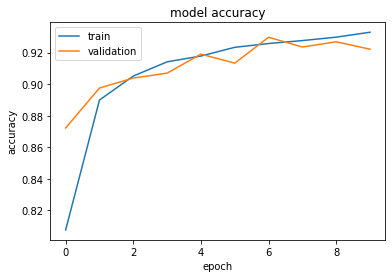

In [19]:
plot_accu(history)


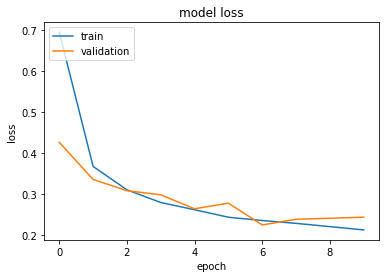

In [20]:
plot_loss(history)

In [21]:
test_gen = ImageDataGenerator(rescale=1/255,rotation_range=5, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness)

test_data = test_gen.flow_from_directory(directory="D:/ASL classification/data_split/test" , target_size=(200,200) , color_mode="rgb" , batch_size=32 , class_mode="categorical" , shuffle=True , seed = 42)

Found 8700 images belonging to 29 classes.


In [22]:
evaluate = model.evaluate(test_data)

272/272 [==============================] - 97s 357ms/step - loss: 0.2440 - accuracy: 0.9245


In [23]:
test1 = "D:/ASL classification/test1.jpg"

In [24]:
import cv2 

In [25]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input

Input image shape: (1, 224, 224, 3)


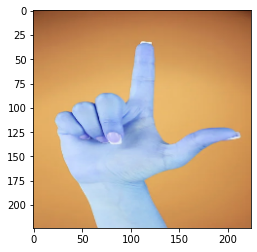

In [26]:
img = cv2.imread(test1)
img = cv2.resize(img,(224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
x = x/255

print('Input image shape:', x.shape)


plt.imshow(img)





In [27]:
preds=model.predict(x)
print("predicted class: ", preds )
#yes image 

1/1 [==============================] - 1s 1s/step
predicted class:  [[7.94527023e-06 4.76105401e-04 1.10206463e-06 9.72488488e-06
  2.73786573e-04 5.64755919e-06 1.77260873e-07 6.35801644e-06
  1.67014394e-02 1.99897855e-07 9.30364418e-04 2.65783608e-01
  3.82100930e-04 2.74828635e-03 5.34473247e-06 6.44936108e-07
  7.30111367e-08 5.17568060e-06 1.42794230e-03 1.12980545e-01
  5.38758235e-03 9.32207406e-02 5.75086055e-03 2.99402196e-02
  4.62749541e-01 4.46633239e-05 1.13861437e-03 1.71706397e-05
  3.98718112e-06]]


In [28]:
print(np.argmax(preds[0]))

24


In [29]:
test2 = "D:/ASL classification/test3.jpg"

Input image shape: (1, 224, 224, 3)


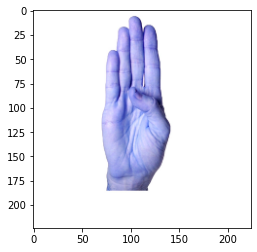

In [30]:
img2 = cv2.imread(test2)
img2 = cv2.resize(img2,(224, 224))

x = np.expand_dims(img2, axis=0)
x = preprocess_input(x)
x = x/255

print('Input image shape:', x.shape)


plt.imshow(img2)


In [31]:
preds=model.predict(x)
print("predicted class: ", preds )
#yes image 

1/1 [==============================] - 0s 25ms/step
predicted class:  [[1.9657580e-02 5.0053596e-02 1.0364645e-09 2.6382439e-04 7.9374135e-02
  6.0471007e-07 6.0925355e-05 6.7935098e-04 4.3329552e-02 7.0070778e-03
  4.1003767e-01 1.3478739e-04 3.0772772e-01 2.7279458e-03 7.5559421e-07
  2.1827251e-05 4.8594866e-05 3.5635594e-03 8.2894869e-04 6.7348464e-04
  1.9917676e-02 1.3682529e-02 7.7837857e-04 1.7519346e-03 7.2014687e-04
  6.7019747e-03 8.4559144e-03 2.1798629e-02 9.0296106e-07]]


In [32]:
print(np.argmax(preds[0]))

10


In [33]:
model = tf.keras.models.load_model("D:\ASL classification\codes\mobile.hdf5")

In [34]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("ASL.tflite", 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\SB584~1.VIK\AppData\Local\Temp\tmpo5b8v7o2\assets


INFO:tensorflow:Assets written to: C:\Users\SB584~1.VIK\AppData\Local\Temp\tmpo5b8v7o2\assets
